# DataSet History:
#### This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates. 
#### Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. 
#### In this dataset, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data. 
#### The dataset is comprised of 81 variables and contains 113937 entries.
### Data Features:
* LoanStatus : Current status of the loan like chargedoff, completed, defauted etc…

* EstimatedEffectiveYield : Yield of lenders from borrowers minus the processing fee and late fines

* ProsperScore : Risk Factor score from 1 to 10. 10 being least risky

* BorrowerAPR : The Borrower’s Annual Percentage Rate (APR) for the loan.

* BorrowerRate : The Borrower’s interest rate for this loan.

* ListingCategory..numeric. : Prosper rating for borrowers in numbers

* EmploymentStatus : Current type of employment

* Occupation : Occupation of borrower at the time of listing

* EmploymentStatusDuration : How long the employee has been employed

* IsBorrowerHomeowner : Does the borrower owns house at the time of listing (True & False)

* ProsperRating..Alpha. : Prosper rating for borrowers in alphabets

* IncomeVerifiable : If the income of the borrower is verifiable at the time of listing (True & False)

* StatedMonthlyIncome : Monthly income of the borrower

* MonthlyLoanPayment : Monthly loan payment amount

* Recommendations : Recommendations the borrowers has at the time of listing

* DebtToIncomeRatio : The debt to income ratio of the borrower at the time the credit profile was pulled.

* LoanOriginalAmount : Original amount of the loan

* LoanOriginationQuarter : Quarter of the month when loan was originated

In [3]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
sns.set_theme(style="darkgrid")
%matplotlib inline

In [4]:
# load data to a pandas dataframe
# df = pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")
df = pd.read_csv("prosperLoanData.csv")

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# EDA:

In [5]:
def data_analysis(data):
    
    # The shape of the data
    print("The shape of the data set:")
    print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")
    
    print('\n***********************************************')
    # Missing Values Check
    print("The existence of missing values in each column:")
    print(data.isnull().any())
    
    print('\n***********************************************')
    # Info of the data
    print("General information about the data:")
    print(data.info())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print("The number of unique values in each column:")
    print(data.nunique())

In [6]:
data_analysis(df)

The shape of the data set:
The data set consists of 113937 rows and 81 columns.

***********************************************
The existence of missing values in each column:
ListingKey                     False
ListingNumber                  False
ListingCreationDate            False
CreditGrade                     True
Term                           False
                               ...  
PercentFunded                  False
Recommendations                False
InvestmentFromFriendsCount     False
InvestmentFromFriendsAmount    False
Investors                      False
Length: 81, dtype: bool

***********************************************
General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  obj

In [7]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
# check for duplicated values
sum(df.duplicated())

0

In [9]:
missing_columns = []
for col_name in df.columns:
    if df[col_name].isnull().any() == True:
      missing_columns.append(col_name)  

### Observation:

#### Missing values for CreditGrade

In [10]:
missing_columns

['CreditGrade',
 'ClosedDate',
 'BorrowerAPR',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'GroupKey',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOut

####  Label Encoding needs to be done for Categorical Items:

In [11]:
cat_df = df.select_dtypes(include=['object'])
cat_df.columns

Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

# Handling The missing values


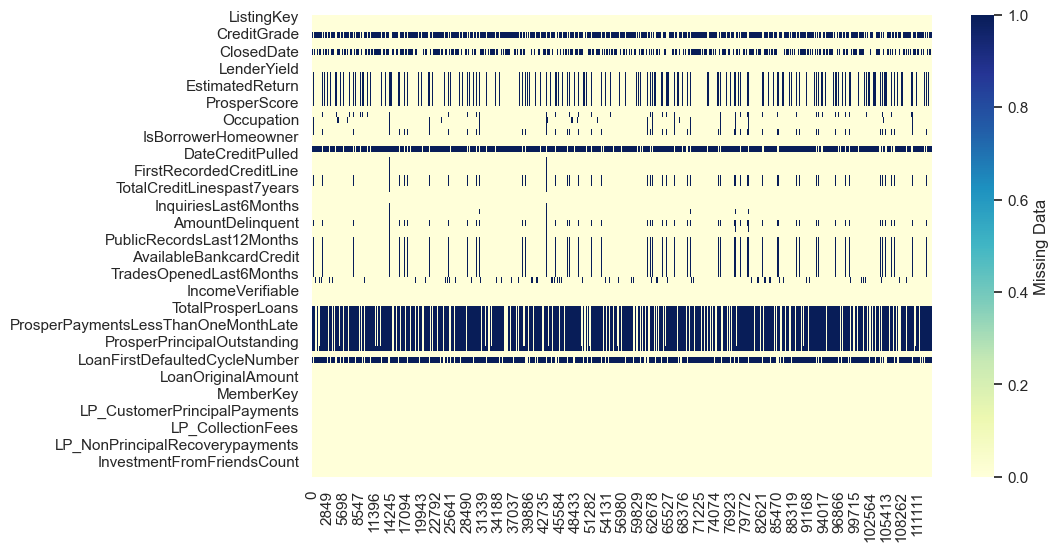

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


#### Distribution before handling missing data:

In [13]:
null_count = []
for i in missing_columns:
    null_count.append(df[i].isnull().sum())
pd.DataFrame({'column':missing_columns, 'null_sum':null_count})

,column,null_sum
0,CreditGrade,84984
1,ClosedDate,58848
2,BorrowerAPR,25
3,EstimatedEffectiveYield,29084
4,EstimatedLoss,29084
5,EstimatedReturn,29084
6,ProsperRating (numeric),29084
7,ProsperRating (Alpha),29084
8,ProsperScore,29084
9,BorrowerState,5515


<AxesSubplot:ylabel='Density'>

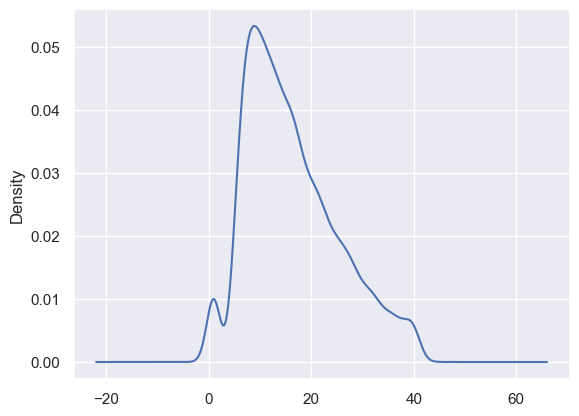

In [14]:
df['LoanFirstDefaultedCycleNumber'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

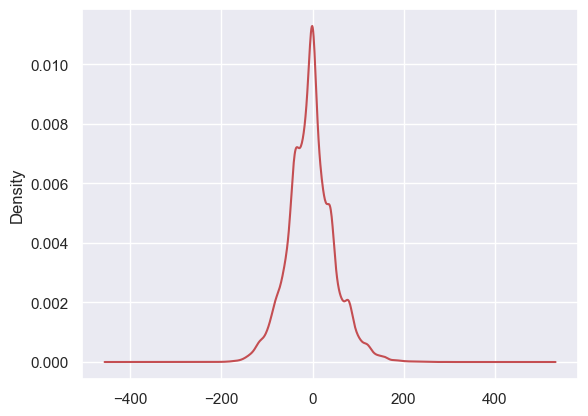

In [15]:
df['ScorexChangeAtTimeOfListing'].plot(kind='kde', color='r')

<AxesSubplot:ylabel='Density'>

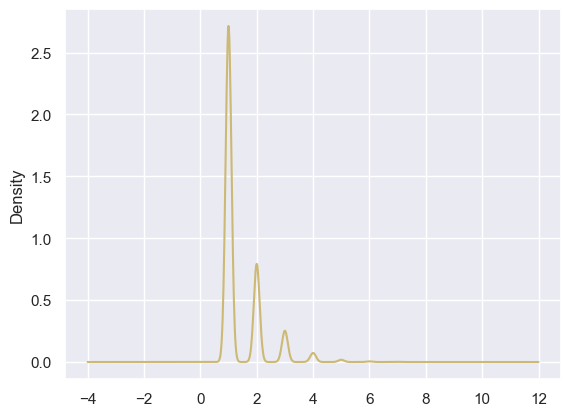

In [16]:
df['TotalProsperLoans'].plot(kind='kde', color='y')

<AxesSubplot:ylabel='Density'>

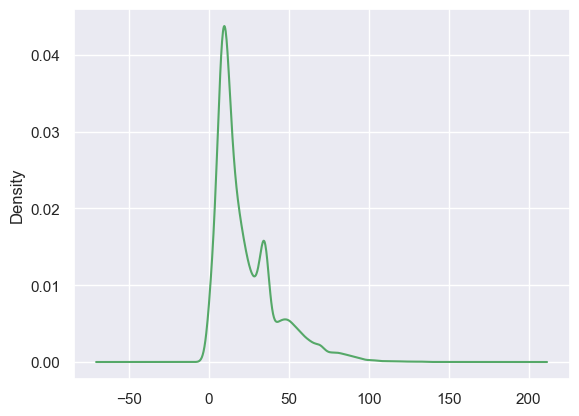

In [17]:
df['TotalProsperPaymentsBilled'].plot(kind='kde', color='g')

<AxesSubplot:ylabel='Density'>

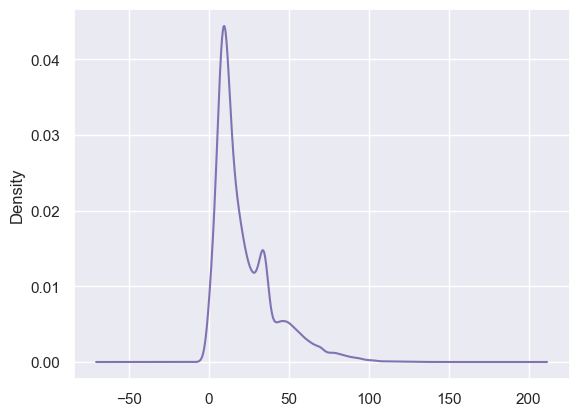

In [18]:
df['OnTimeProsperPayments'].plot(kind='kde', color='m')

<AxesSubplot:ylabel='Density'>

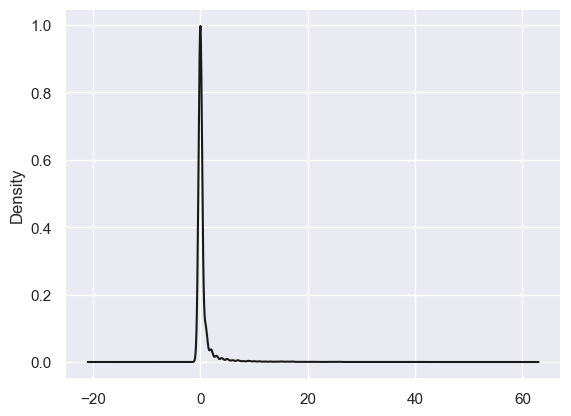

In [19]:
df['ProsperPaymentsLessThanOneMonthLate'].plot(kind='kde', color='k')

<AxesSubplot:ylabel='Density'>

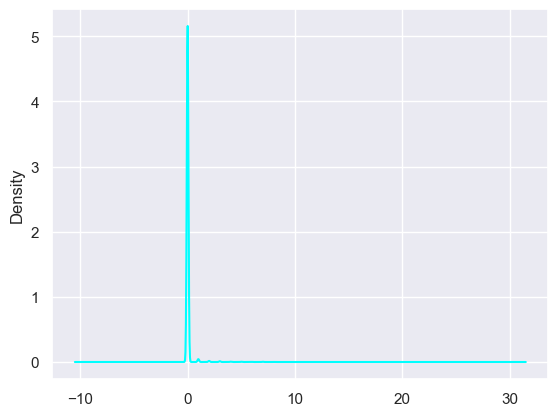

In [20]:
df['ProsperPaymentsOneMonthPlusLate'].plot(kind='kde', color='cyan')

In [21]:
for i in missing_columns:
    fill_list = df[i].dropna().tolist()
    df[i] = df[i].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))  

In [22]:
null_count_ater_handling = []
for i in missing_columns:
    null_count_ater_handling.append(df[i].isnull().sum())
pd.DataFrame({'column':missing_columns, 'null_sum':null_count_ater_handling})

,column,null_sum
0,CreditGrade,0
1,ClosedDate,0
2,BorrowerAPR,0
3,EstimatedEffectiveYield,0
4,EstimatedLoss,0
5,EstimatedReturn,0
6,ProsperRating (numeric),0
7,ProsperRating (Alpha),0
8,ProsperScore,0
9,BorrowerState,0


In [23]:
df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 81, dtype: int64

#### Distribution before handling missing data:

<AxesSubplot:ylabel='Density'>

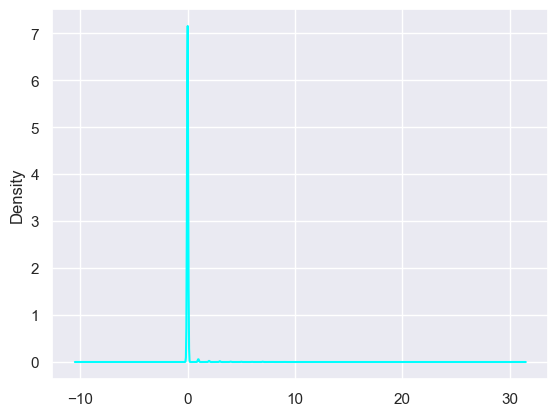

In [30]:
df['ProsperPaymentsOneMonthPlusLate'].plot(kind='kde', color='cyan')

<AxesSubplot:ylabel='Density'>

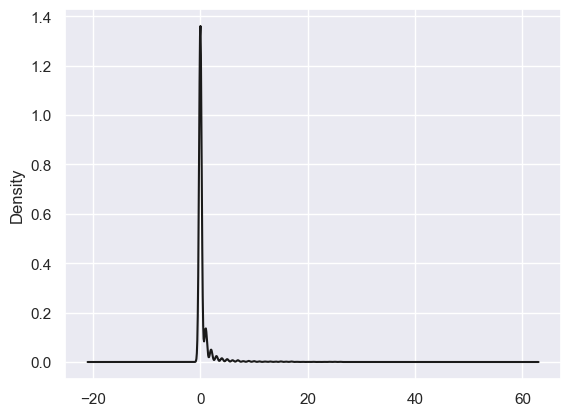

In [25]:
df['ProsperPaymentsLessThanOneMonthLate'].plot(kind='kde', color='k')

<AxesSubplot:ylabel='Density'>

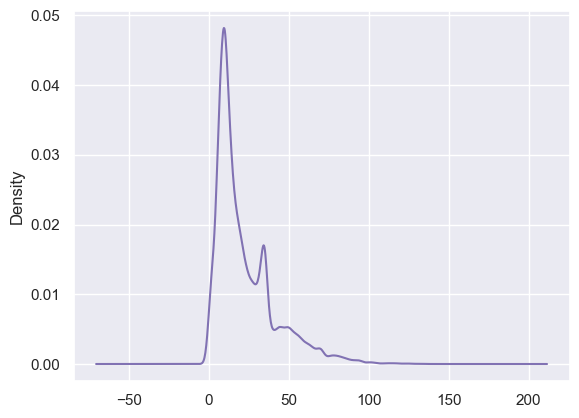

In [26]:
df['OnTimeProsperPayments'].plot(kind='kde', color='m')

<AxesSubplot:ylabel='Density'>

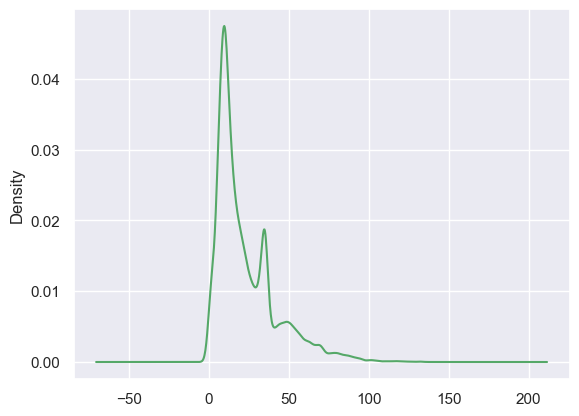

In [27]:
df['TotalProsperPaymentsBilled'].plot(kind='kde', color='g')

<AxesSubplot:ylabel='Density'>

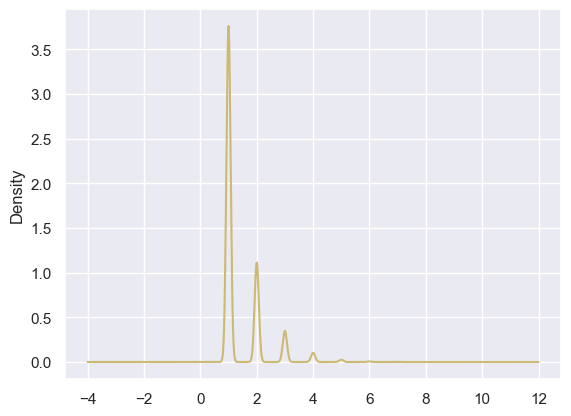

In [28]:
df['TotalProsperLoans'].plot(kind='kde', color='y')

<AxesSubplot:ylabel='Density'>

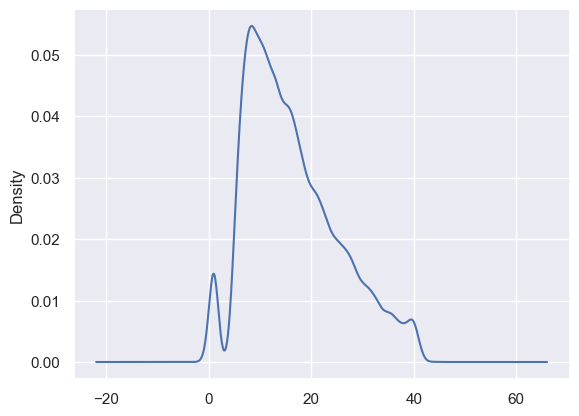

In [29]:
df['LoanFirstDefaultedCycleNumber'].plot(kind='kde')

# Data Visualization:

In [32]:
 num_df = df.select_dtypes(include=['float64', 'int64'])

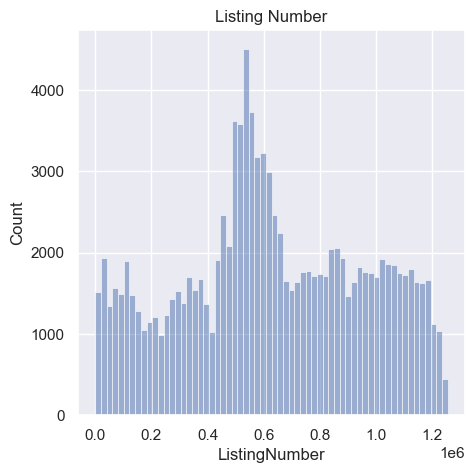

In [33]:
plt.figure(figsize=(5,5))
plt.title("Listing Number")
sns.histplot(data=df, x='ListingNumber', alpha=0.5)
plt.show()

<AxesSubplot:title={'center':'Credit Grade'}, xlabel='count', ylabel='CreditGrade'>

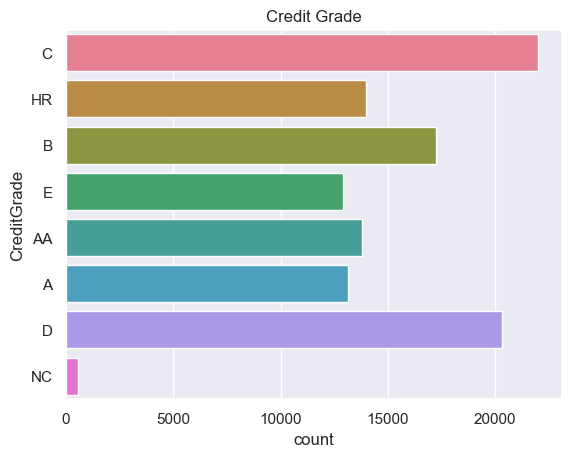

In [46]:
plt.title("Credit Grade")
sns.countplot(data=df, y='CreditGrade', palette='husl')

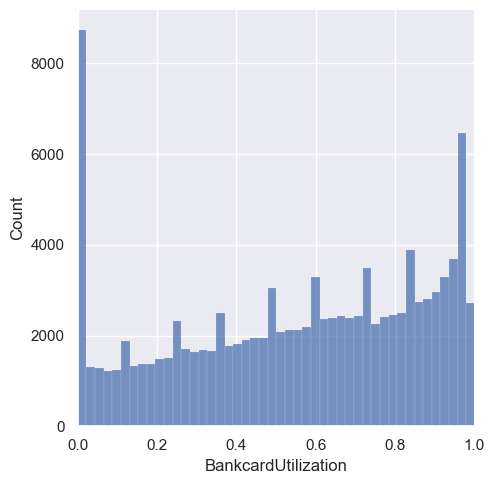

In [34]:
g = sns.displot(data= df, x='BankcardUtilization')
g.set(xlim=(0, 1))

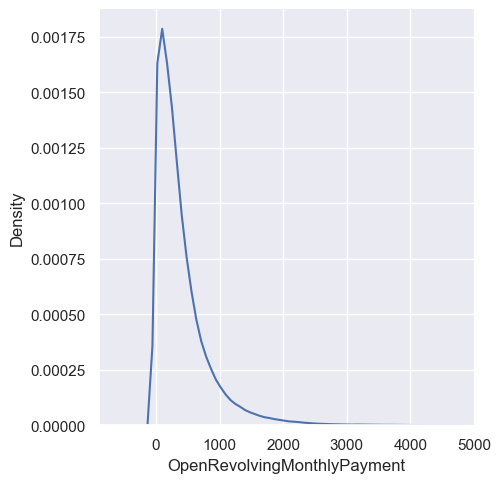

In [35]:
a = sns.displot(data= df, x='OpenRevolvingMonthlyPayment', kind='kde')
a.set(xlim=(None, 5000))

<AxesSubplot:xlabel='count', ylabel='LoanOriginationQuarter'>

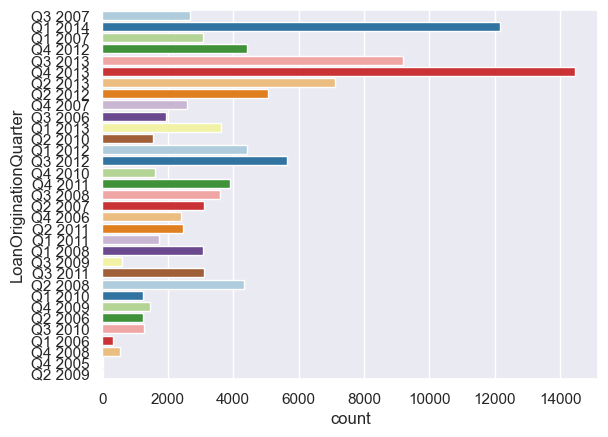

In [63]:
sns.countplot(data=df, y='LoanOriginationQuarter', palette='Paired')

<AxesSubplot:xlabel='BorrowerRate', ylabel='Density'>

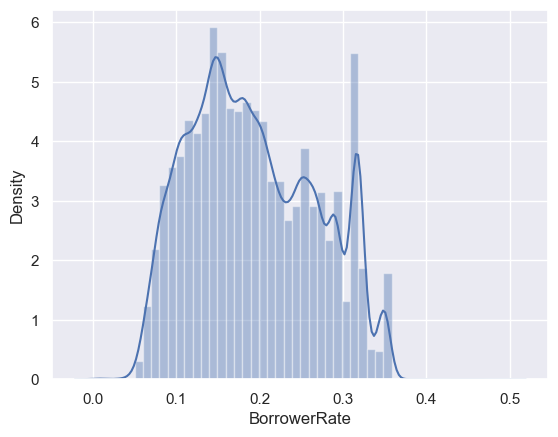

In [37]:
sns.distplot(df['BorrowerRate'])

<AxesSubplot:title={'center':'Credit Grade'}, xlabel='count', ylabel='LoanStatus'>

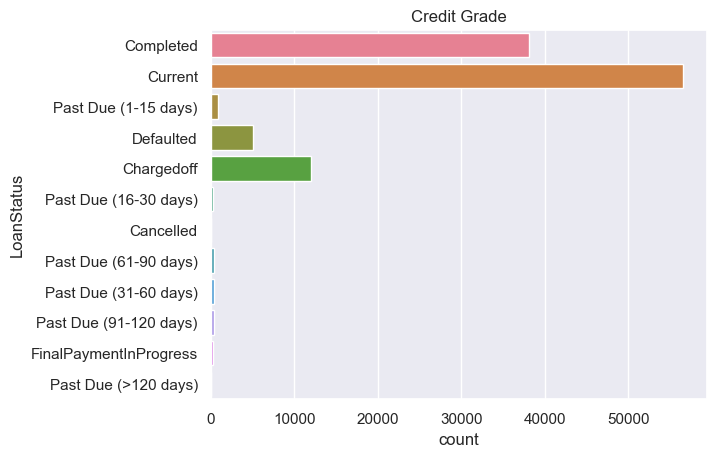

In [62]:
plt.title("Credit Grade")
sns.countplot(data=df, y='LoanStatus', palette='husl')

<AxesSubplot:xlabel='MonthlyLoanPayment', ylabel='CreditGrade'>

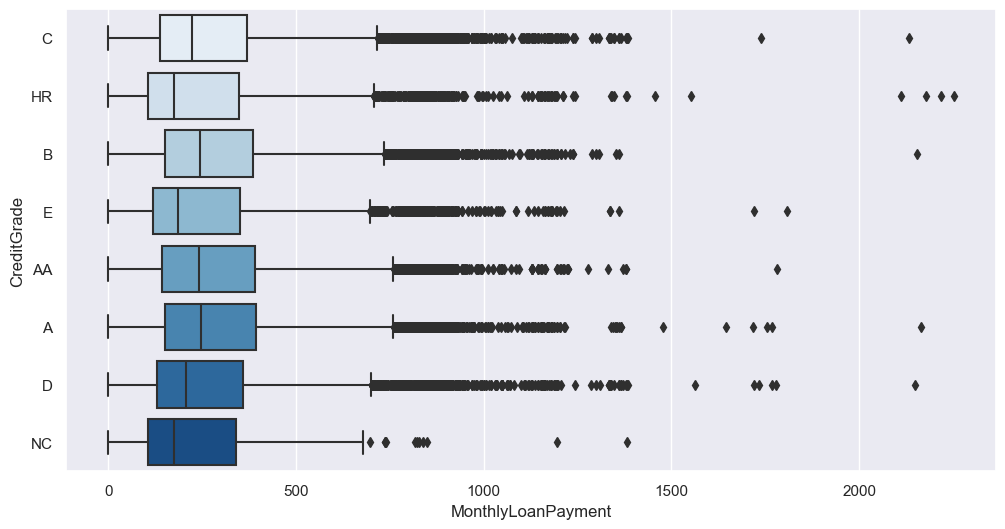

In [74]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=df,x='MonthlyLoanPayment',y='CreditGrade', palette='Blues')

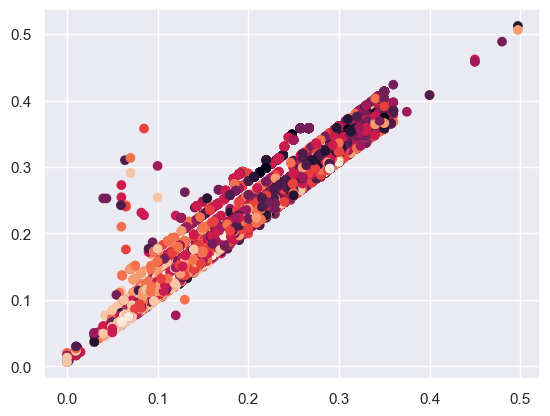

In [75]:
plt.scatter(data=df,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore')

In [66]:
# df['LoanOriginationQuarter'].value_counts()

In [77]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

# Encoding

In [81]:
# Changing Loan orgination date into date time format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [82]:
# Changing Loan orgination date into date time format
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

# Handling Outliers:

ListingNumber                     AxesSubplot(0.125,0.798085;0.065678x0.0819149)
Term                           AxesSubplot(0.203814,0.798085;0.065678x0.0819149)
BorrowerAPR                    AxesSubplot(0.282627,0.798085;0.065678x0.0819149)
BorrowerRate                   AxesSubplot(0.361441,0.798085;0.065678x0.0819149)
LenderYield                    AxesSubplot(0.440254,0.798085;0.065678x0.0819149)
                                                     ...                        
PercentFunded                  AxesSubplot(0.597881,0.306596;0.065678x0.0819149)
Recommendations                AxesSubplot(0.676695,0.306596;0.065678x0.0819149)
InvestmentFromFriendsCount     AxesSubplot(0.755508,0.306596;0.065678x0.0819149)
InvestmentFromFriendsAmount    AxesSubplot(0.834322,0.306596;0.065678x0.0819149)
Investors                         AxesSubplot(0.125,0.208298;0.065678x0.0819149)
Length: 61, dtype: object

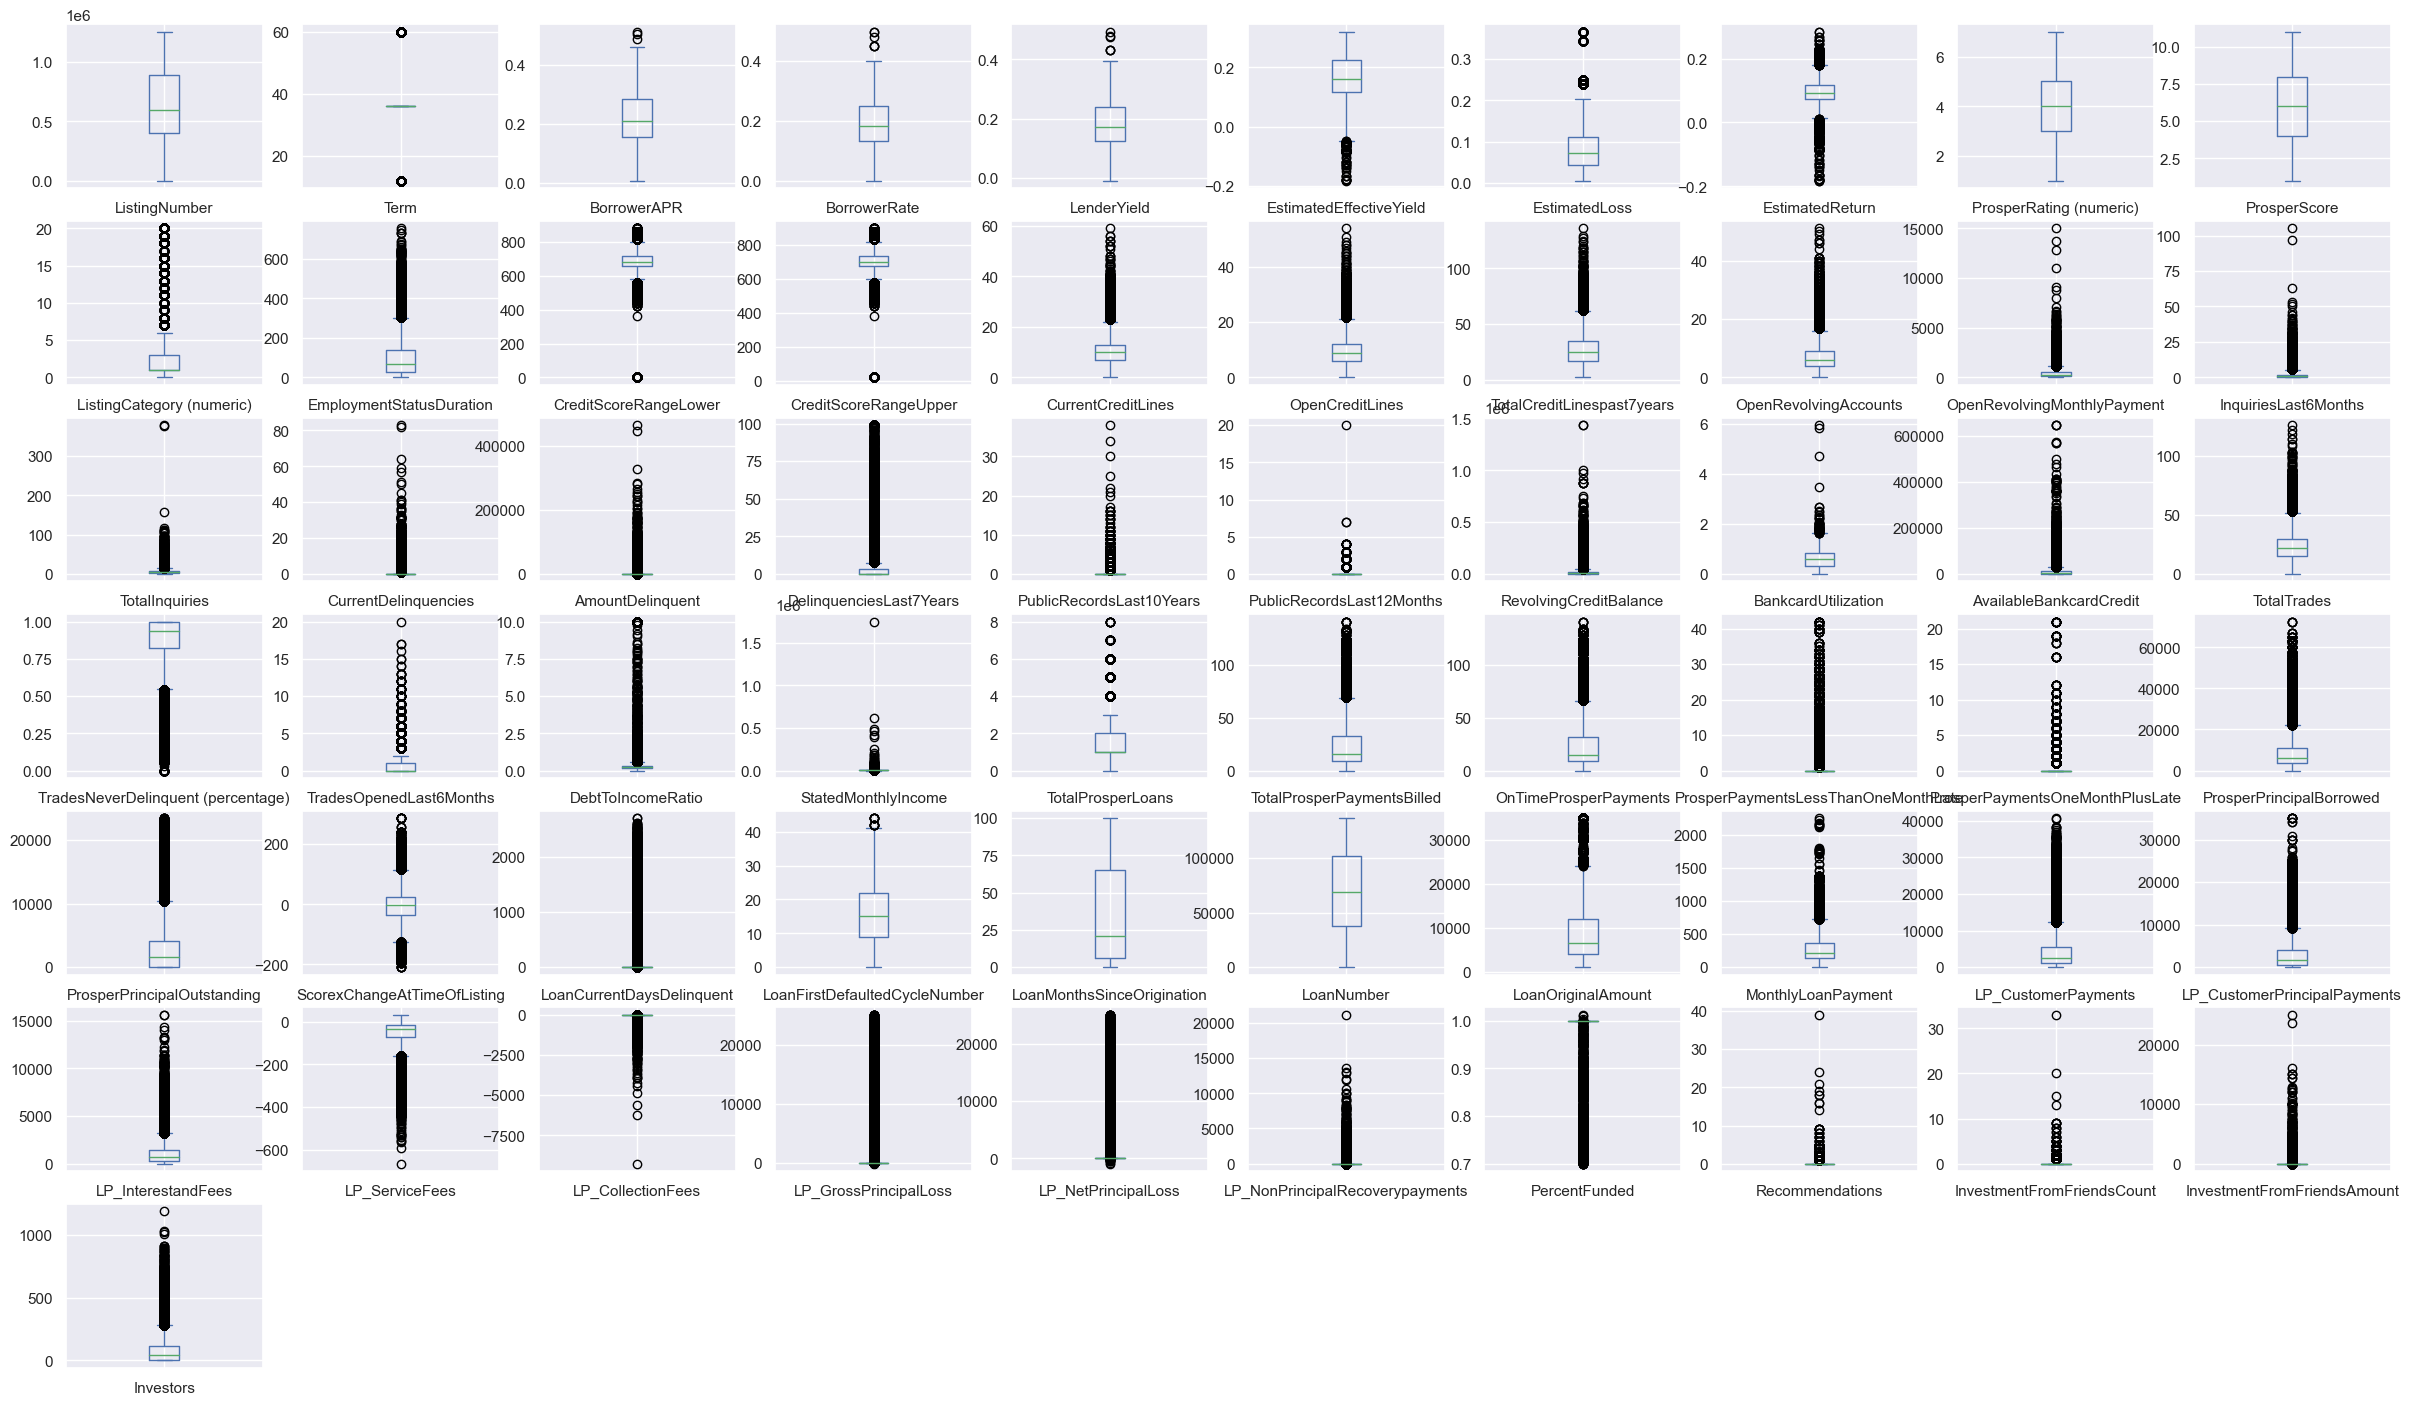

In [78]:
df.plot(kind="box",subplots=True,layout=(8,10),figsize=(30,20))

In [84]:
df = df[df['BorrowerAPR']<0.45]
df = df[df['BorrowerRate']<0.45]
df = df[df['LenderYield']<0.35]
df = df[df['EstimatedLoss']<0.1]
df = df[df['ListingCategory (numeric)']<260]
df = df[df['EmploymentStatusDuration']<400]
df = df[df['CurrentCreditLines']<20]
df = df[df['OpenCreditLines']<60]
df = df[df['TotalCreditLinespast7years']<50]
df = df[df['OpenRevolvingAccounts']<5500]
df = df[df['LP_GrossPrincipalLoss']<1600]
# df = df[df['EmploymentStatus']<3]
df = df[df['TotalProsperLoans']<3]
df = df[df['BankcardUtilization']<3]



ListingNumber                     AxesSubplot(0.125,0.798085;0.065678x0.0819149)
Term                           AxesSubplot(0.203814,0.798085;0.065678x0.0819149)
BorrowerAPR                    AxesSubplot(0.282627,0.798085;0.065678x0.0819149)
BorrowerRate                   AxesSubplot(0.361441,0.798085;0.065678x0.0819149)
LenderYield                    AxesSubplot(0.440254,0.798085;0.065678x0.0819149)
                                                     ...                        
PercentFunded                  AxesSubplot(0.597881,0.306596;0.065678x0.0819149)
Recommendations                AxesSubplot(0.676695,0.306596;0.065678x0.0819149)
InvestmentFromFriendsCount     AxesSubplot(0.755508,0.306596;0.065678x0.0819149)
InvestmentFromFriendsAmount    AxesSubplot(0.834322,0.306596;0.065678x0.0819149)
Investors                         AxesSubplot(0.125,0.208298;0.065678x0.0819149)
Length: 61, dtype: object

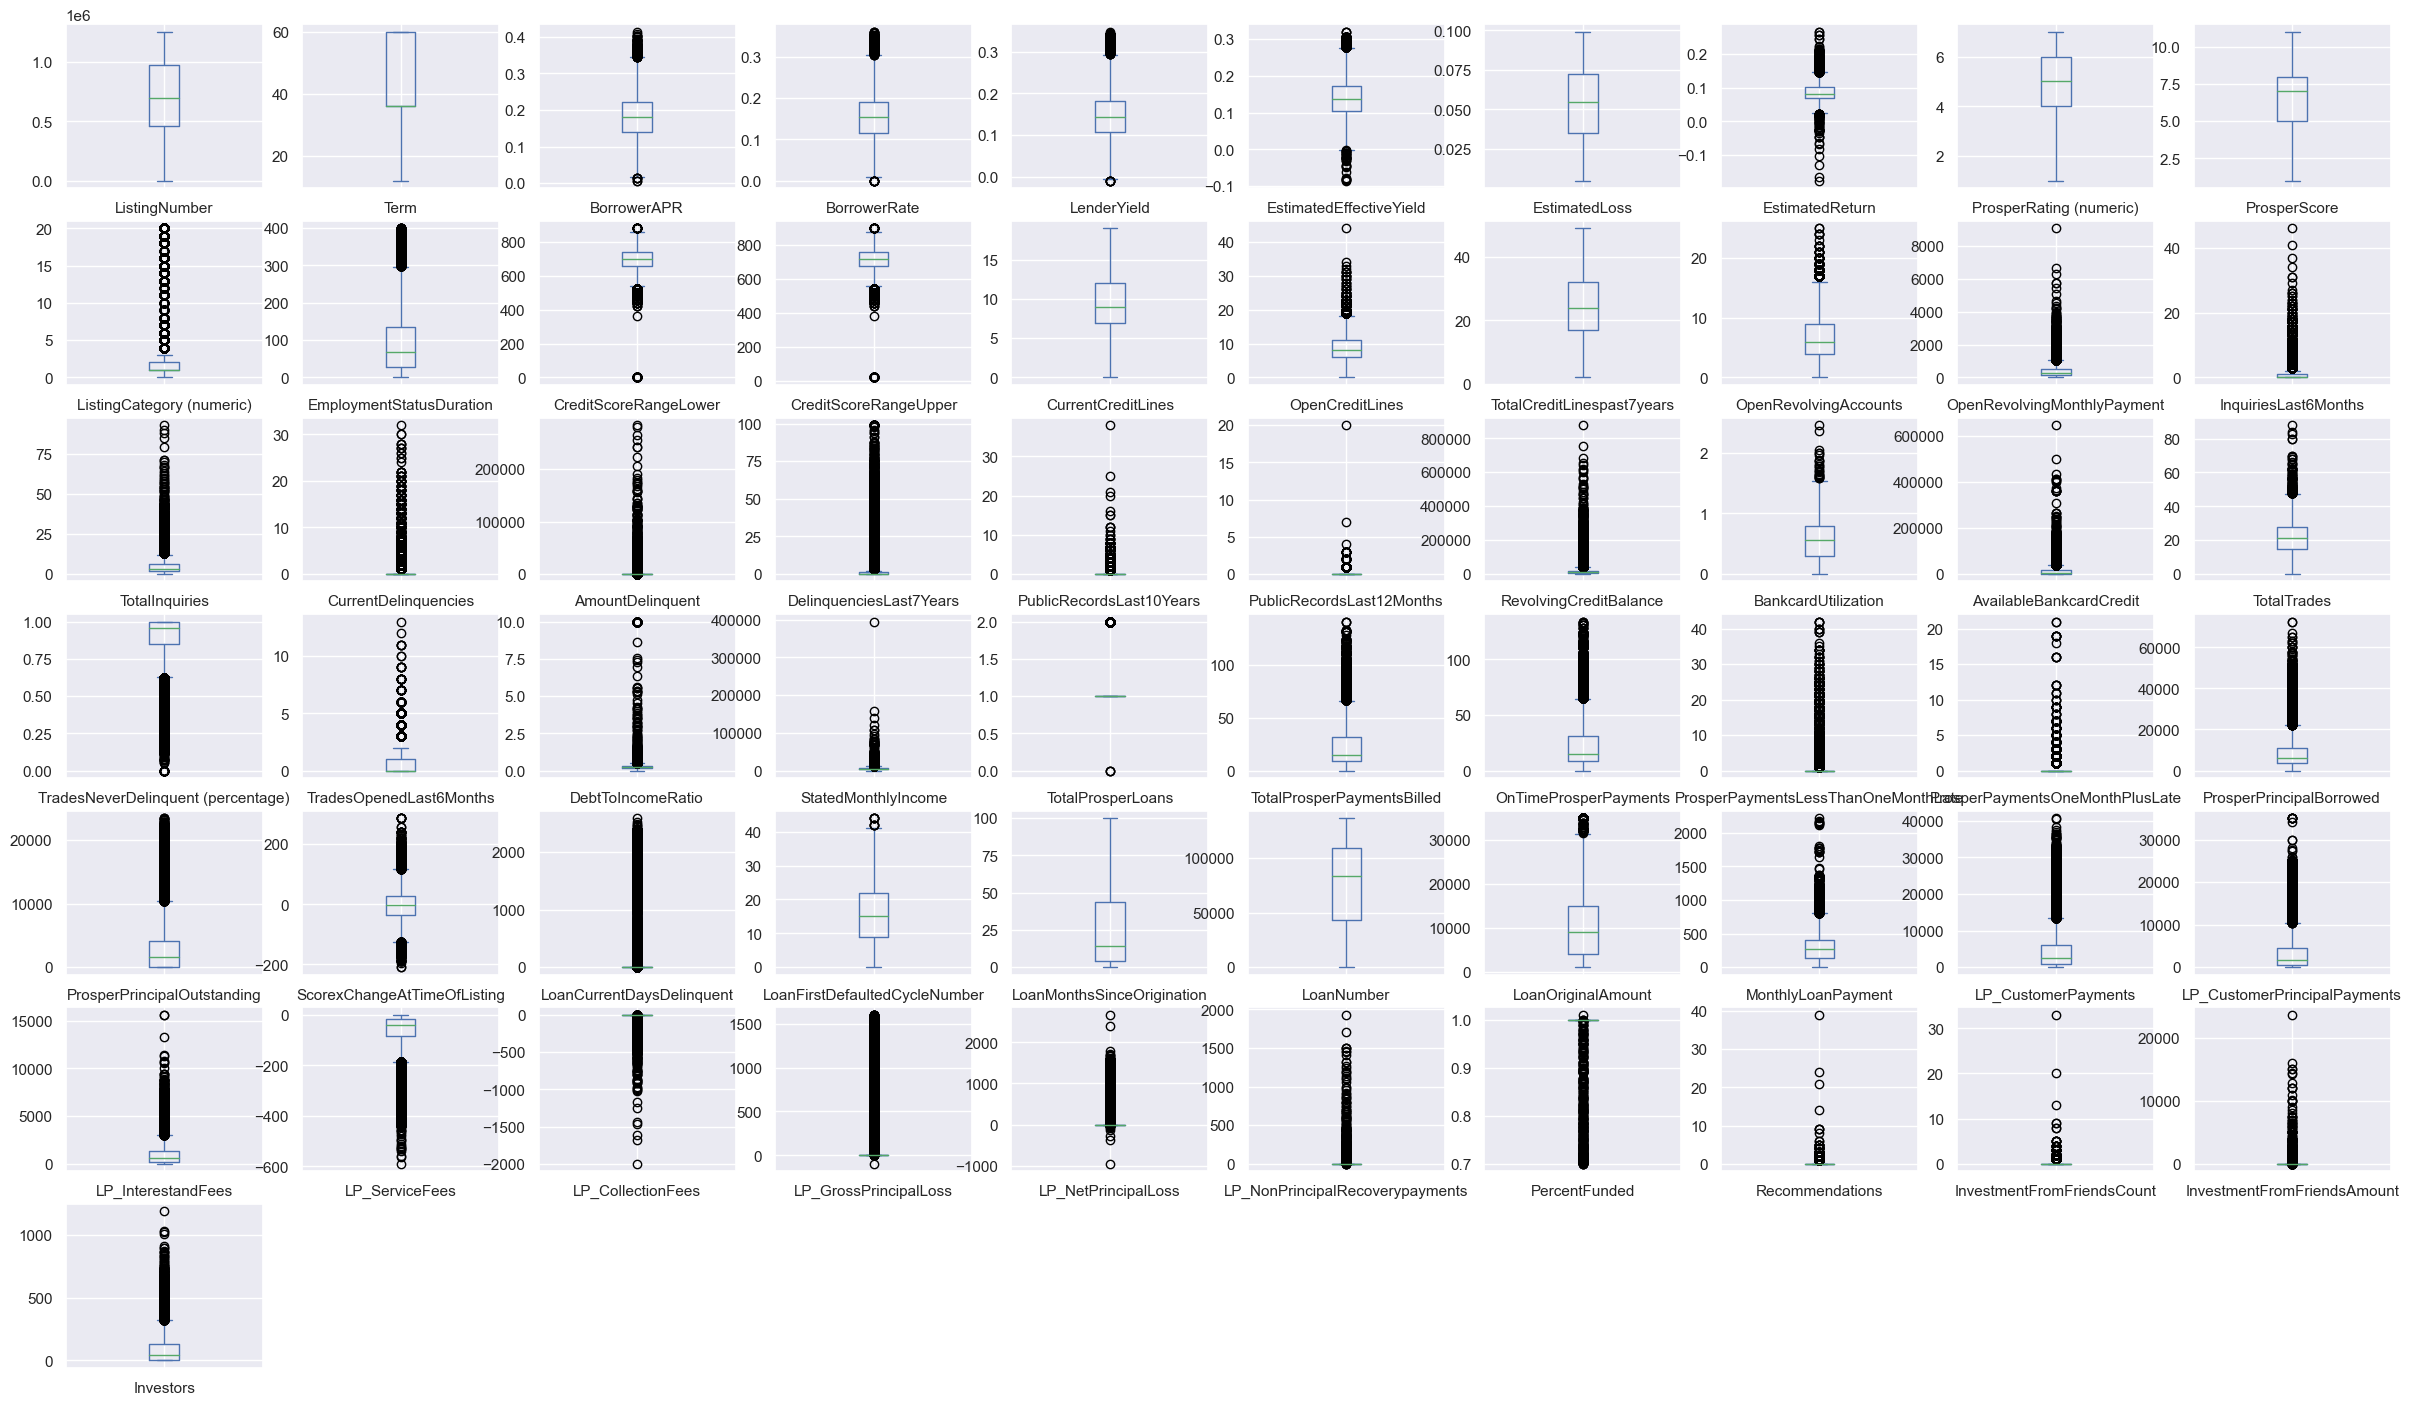

In [85]:
df.plot(kind="box",subplots=True,layout=(8,10),figsize=(30,20))